<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista3_Simula%C3%A7%C3%A3o_Estoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1ª Questão letra A:**

**Taxa de chegada = 4**

**Demanda binomial com média 10 e p = 1/2**

**Taxa de reposição = 1/30**

**Ponto crítico(z) = 200**

**Capacidade(s) = 1000**

In [99]:
import numpy as np
import heapq

class EstoqueSimulacao:
    def __init__(self, taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade):
        self.tempo_atual = 0
        self.tempo_simulacao = 0
        self.estoque = capacidade
        self.ponto_critico = ponto_critico
        self.capacidade = capacidade
        self.taxa_chegada_clientes = taxa_chegada_clientes
        self.media_demanda = media_demanda
        self.prob_demanda = prob_demanda
        self.taxa_reposicao = taxa_reposicao
        self.eventos = []

    def chegada_cliente(self):
        tempo_chegada = self.tempo_atual + np.random.exponential(1/self.taxa_chegada_clientes)
        heapq.heappush(self.eventos, (tempo_chegada, 'chegada_cliente'))

    def venda_produto(self):
        demanda = np.random.binomial(self.media_demanda, self.prob_demanda)
        if self.estoque >= demanda:
          self.estoque -= demanda
          if self.estoque < self.ponto_critico and self.estoque + demanda >= self.ponto_critico:
              self.agendar_reposicao()

    def agendar_reposicao(self):
        tempo_reposicao = self.tempo_atual + np.random.exponential(1/self.taxa_reposicao)
        heapq.heappush(self.eventos, (tempo_reposicao, 'reposicao_estoque'))
        print(f'Tempo: {self.tempo_simulacao}, Estoque: {self.estoque}, Evento = Agendamento de reposição')

    def reposicao_estoque(self):
        self.estoque = self.estoque + (self.capacidade - self.ponto_critico)

    def executar_simulacao(self, tempo_simulacao):
        self.tempo_simulacao = tempo_simulacao
        self.chegada_cliente()

        while self.tempo_atual < self.tempo_simulacao:
            evento = heapq.heappop(self.eventos)
            self.tempo_atual, tipo_evento = evento

            if tipo_evento == 'chegada_cliente':
                self.chegada_cliente()
                self.venda_produto()

            elif tipo_evento == 'reposicao_estoque':
                self.reposicao_estoque()

            print(f'Tempo: {self.tempo_atual}, Estoque: {self.estoque}, Evento = {tipo_evento}')

# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 200
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.20550602712148733, Estoque: 997, Evento = chegada_cliente
Tempo: 0.45683321323219506, Estoque: 995, Evento = chegada_cliente
Tempo: 0.5231944770360416, Estoque: 991, Evento = chegada_cliente
Tempo: 0.6422743334619833, Estoque: 988, Evento = chegada_cliente
Tempo: 1.0738702810695988, Estoque: 984, Evento = chegada_cliente
Tempo: 1.274560131970249, Estoque: 978, Evento = chegada_cliente
Tempo: 1.3014806209098424, Estoque: 971, Evento = chegada_cliente
Tempo: 1.512210703815992, Estoque: 966, Evento = chegada_cliente
Tempo: 1.8295102495277127, Estoque: 962, Evento = chegada_cliente
Tempo: 2.142017912970227, Estoque: 958, Evento = chegada_cliente
Tempo: 2.2913010153127122, Estoque: 954, Evento = chegada_cliente
Tempo: 2.8470512206054273, Estoque: 949, Evento = chegada_cliente
Tempo: 2.9643394321218572, Estoque: 944, Evento = chegada_cliente
Tempo: 3.408603380428219, Estoque: 942, Evento = chegada_cliente
Tempo: 3.5879807336931218, Estoque: 934, Evento = chegada_cliente
Tempo: 3.698

1ª Questão Letra A

In [100]:
import numpy as np
import heapq

class EstoqueSimulacao:
    def __init__(self, taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade):
        self.tempo_atual = 0
        self.tempo_simulacao = 0
        self.estoque = capacidade
        self.ponto_critico = ponto_critico
        self.capacidade = capacidade
        self.taxa_chegada_clientes = taxa_chegada_clientes
        self.media_demanda = media_demanda
        self.prob_demanda = prob_demanda
        self.taxa_reposicao = taxa_reposicao
        self.eventos = []
        self.clientes_atendidos = 0
        self.clientes_rejeitados = 0
        self.vetor_estoque = []
        self.vetor_ca = []
        self.vetor_cr = []

    def chegada_cliente(self):
        tempo_chegada = self.tempo_atual + np.random.exponential(1/self.taxa_chegada_clientes)
        heapq.heappush(self.eventos, (tempo_chegada, 'chegada_cliente'))

    def venda_produto(self):
        demanda = np.random.binomial(self.media_demanda, self.prob_demanda)
        if self.estoque >= demanda:
          self.estoque -= demanda
          if self.estoque < self.ponto_critico and self.estoque + demanda >= self.ponto_critico:
              self.agendar_reposicao()
        else:
          self.clientes_rejeitados = self.clientes_rejeitados + 1

    def agendar_reposicao(self):
        tempo_reposicao = self.tempo_atual + np.random.exponential(1/self.taxa_reposicao)
        heapq.heappush(self.eventos, (tempo_reposicao, 'reposicao_estoque'))
        print(f'Tempo: {self.tempo_simulacao}, Estoque: {self.estoque}, Evento = Agendamento de reposição, Clientes Atendidos = {self.clientes_atendidos}, Clientes Rejeitados= {self.clientes_rejeitados}')

    def reposicao_estoque(self):
        self.estoque = self.estoque + (self.capacidade - self.ponto_critico)

    def executar_simulacao(self, tempo_simulacao):
        self.tempo_simulacao = tempo_simulacao
        self.chegada_cliente()

        while self.tempo_atual < self.tempo_simulacao:
            evento = heapq.heappop(self.eventos)
            self.tempo_atual, tipo_evento = evento

            if tipo_evento == 'chegada_cliente':
                self.chegada_cliente()
                self.venda_produto()
                self.clientes_atendidos = self.clientes_atendidos + 1

            elif tipo_evento == 'reposicao_estoque':
                self.reposicao_estoque()

            self.vetor_estoque.append(self.estoque)
            self.vetor_ca.append(self.clientes_atendidos)
            self.vetor_cr.append(self.clientes_rejeitados)
            print(f'Tempo: {self.tempo_atual}, Estoque: {self.estoque}, Evento = {tipo_evento}, Clientes Atendidos = {self.clientes_atendidos}, Clientes Rejeitados = {self.clientes_rejeitados}')



# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 200
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.1529900186805073, Estoque: 997, Evento = chegada_cliente, Clientes Atendidos = 1, Clientes Rejeitados = 0
Tempo: 0.31406982497896585, Estoque: 989, Evento = chegada_cliente, Clientes Atendidos = 2, Clientes Rejeitados = 0
Tempo: 0.382668276576364, Estoque: 981, Evento = chegada_cliente, Clientes Atendidos = 3, Clientes Rejeitados = 0
Tempo: 0.585586281539328, Estoque: 976, Evento = chegada_cliente, Clientes Atendidos = 4, Clientes Rejeitados = 0
Tempo: 1.3084244549773816, Estoque: 969, Evento = chegada_cliente, Clientes Atendidos = 5, Clientes Rejeitados = 0
Tempo: 1.5460058673995625, Estoque: 962, Evento = chegada_cliente, Clientes Atendidos = 6, Clientes Rejeitados = 0
Tempo: 1.5938228153955811, Estoque: 956, Evento = chegada_cliente, Clientes Atendidos = 7, Clientes Rejeitados = 0
Tempo: 1.7452376053199659, Estoque: 949, Evento = chegada_cliente, Clientes Atendidos = 8, Clientes Rejeitados = 0
Tempo: 1.8170710772844392, Estoque: 942, Evento = chegada_cliente, Clientes Atend

# 1ª Questão Letra B:

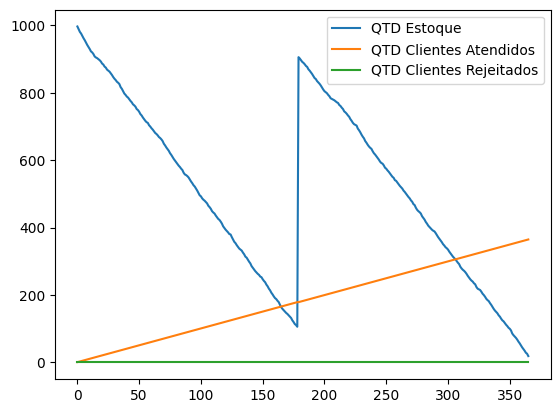

In [101]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(simulacao.vetor_estoque))]
aux.plot(eixo_x, simulacao.vetor_estoque,label = 'QTD Estoque')
aux.legend(loc = 'upper right')
aux.plot(eixo_x, simulacao.vetor_ca, label = 'QTD Clientes Atendidos')
aux.legend(loc='upper right')
aux.plot(eixo_x, simulacao.vetor_cr, label = 'QTD Clientes Rejeitados')
aux.legend(loc = 'upper right')
plt.show()

# 1ª Questão Letra C:

In [102]:
# Parâmetros iniciais
taxa_chegada_clientes = 4
media_demanda = 10
prob_demanda = 0.5
taxa_reposicao = 1/30
ponto_critico = 400
capacidade = 1000
tempo_simulacao = 100

# Inicialização e execução da simulação
simulacao = EstoqueSimulacao(taxa_chegada_clientes, media_demanda, prob_demanda, taxa_reposicao, ponto_critico, capacidade)
simulacao.executar_simulacao(tempo_simulacao)


Tempo: 0.056977407248538545, Estoque: 991, Evento = chegada_cliente, Clientes Atendidos = 1, Clientes Rejeitados = 0
Tempo: 0.21331184799726532, Estoque: 986, Evento = chegada_cliente, Clientes Atendidos = 2, Clientes Rejeitados = 0
Tempo: 1.2908405988544658, Estoque: 981, Evento = chegada_cliente, Clientes Atendidos = 3, Clientes Rejeitados = 0
Tempo: 1.3862435287336432, Estoque: 976, Evento = chegada_cliente, Clientes Atendidos = 4, Clientes Rejeitados = 0
Tempo: 1.492558173615101, Estoque: 969, Evento = chegada_cliente, Clientes Atendidos = 5, Clientes Rejeitados = 0
Tempo: 1.6331313855184595, Estoque: 965, Evento = chegada_cliente, Clientes Atendidos = 6, Clientes Rejeitados = 0
Tempo: 1.845074632517981, Estoque: 959, Evento = chegada_cliente, Clientes Atendidos = 7, Clientes Rejeitados = 0
Tempo: 1.850613351999933, Estoque: 954, Evento = chegada_cliente, Clientes Atendidos = 8, Clientes Rejeitados = 0
Tempo: 2.177054119458822, Estoque: 950, Evento = chegada_cliente, Clientes Atend

*Como o ponto crítico foi mudado para 400, os agendamentos de reposição acontecerão mais cedo, então diminui-se a probabilidade de termos muitos clientes rejeitados.*

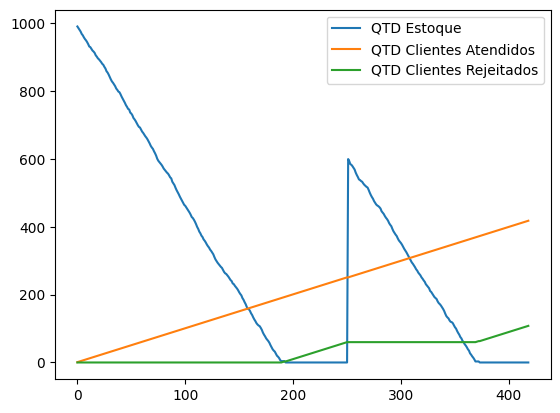

In [103]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(simulacao.vetor_estoque))]
aux.plot(eixo_x, simulacao.vetor_estoque,label = 'QTD Estoque')
aux.legend(loc = 'upper right')
aux.plot(eixo_x, simulacao.vetor_ca, label = 'QTD Clientes Atendidos')
aux.legend(loc='upper right')
aux.plot(eixo_x, simulacao.vetor_cr, label = 'QTD Clientes Rejeitados')
aux.legend(loc = 'upper right')
plt.show()

# 2ª Questão

In [104]:
import random
from heapq import heappush, heappop
vetor_n = []
vetor_c = []

In [105]:
# Parâmetros
lamb = 10
mu = 1/20
rho = 2/5
c = 20
K0 = 5000
H = 100

In [106]:
# Eventos
# Um evento é uma tripla (tempo, nome, dados)

def atualizar_capital():
  return K + (t-d)*c*n

def adesao(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n + 1
  if n == 1:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  heappush(LEF, (t+random.expovariate(lamb), 'adesao', () ))
  d = t

def saida(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n - 1
  if n > 0:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  d = t

def ocorrencia(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  if n > 0:
    x = random.normalvariate(50, 20)
    K = K - x
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  d = t


In [107]:
# Variáveis
n = 10
K = K0
t = 0
d = 0

In [108]:
# Definir a lista de eventos futuros

LEF = []

# Eventos iniciais

heappush(LEF, (random.expovariate(lamb), 'adesao', () ) )
if n > 0:
  heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )

# Laço principal

while len(LEF) > 0 and t < H and K >=0:
  evento = heappop(LEF)
  t = evento[0]
  nome = evento[1]
  dados = evento[2]

  if nome == 'adesao':
    adesao(LEF, t, dados)
  elif nome == 'saida':
    saida(LEF, t, dados)
  elif nome == 'ocorrencia':
    ocorrencia(LEF, t, dados)

  print(f"{evento}, n={n}, capital={K}")
  vetor_n.append(n)
  vetor_c.append(K)

(0.021033497213309823, 'adesao', ()), n=11, capital=5004.206699442662
(0.1105309904812488, 'adesao', ()), n=12, capital=5023.896147961609
(0.1632306106281321, 'adesao', ()), n=13, capital=5036.544056796861
(0.2526262125890908, 'adesao', ()), n=14, capital=5059.78691330671
(0.27181497515056047, 'adesao', ()), n=15, capital=5065.159766823921
(0.2876811304215381, 'adesao', ()), n=16, capital=5069.9196134052145
(0.33054244335110167, 'adesao', ()), n=17, capital=5083.6352335426745
(0.5719626537142908, 'adesao', ()), n=18, capital=5165.718105066158
(0.6434835772028353, 'adesao', ()), n=19, capital=5191.465637522035
(0.6856995303771128, 'adesao', ()), n=20, capital=5207.50769972826
(0.9664680277343506, 'ocorrencia', ()), n=20, capital=5264.893768763805
(0.981521541894272, 'adesao', ()), n=21, capital=5270.915174427774
(1.0514134885263562, 'ocorrencia', ()), n=21, capital=5304.448597002336
(1.0536381804939947, 'adesao', ()), n=22, capital=5305.382967628744
(1.0621098710817962, 'adesao', ()), n

# 2ª Questão Letra A:

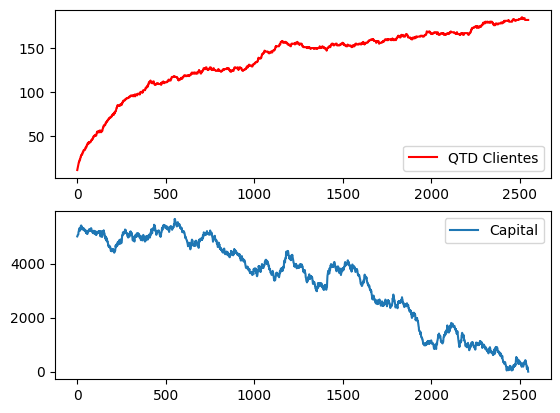

In [109]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots(nrows = 2)
eixo_x = [i for i in range(len(vetor_n))]
aux[0].plot(eixo_x, vetor_n,label = 'QTD Clientes', c = 'r')
aux[0].legend(loc = 'lower right')
aux[1].plot(eixo_x, vetor_c, label = 'Capital')
aux[1].legend(loc='upper right')
plt.show()

# 2ª Questão Letra B:

In [110]:
import random
from heapq import heappush, heappop
vetor_n = []
vetor_c = []

In [111]:
lamb = 10
mu = 1/20
rho = 2/5
c = 35
K0 = 5000
H = 100

In [112]:
# Eventos
# Um evento é uma tripla (tempo, nome, dados)

def atualizar_capital():
  return K + (t-d)*c*n

def adesao(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n + 1
  if n == 1:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  heappush(LEF, (t+random.expovariate(lamb), 'adesao', () ))
  d = t

def saida(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  n = n - 1
  if n > 0:
    heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  d = t

def ocorrencia(LEF, t, dados):
  global n
  global K
  global d
  K = atualizar_capital()
  if n > 0:
    x = random.normalvariate(50, 20)
    K = K - x
    heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )
  d = t


In [113]:
n = 10
K = K0
t = 0
d = 0

In [114]:
# Definir a lista de eventos futuros

LEF = []

# Eventos iniciais

heappush(LEF, (random.expovariate(lamb), 'adesao', () ) )
if n > 0:
  heappush(LEF, (t+random.expovariate(n*mu), 'saida', ()) )
  heappush(LEF, (t+random.expovariate(n*rho), 'ocorrencia', ()) )

# Laço principal

while len(LEF) > 0 and t < H and K >=0:
  evento = heappop(LEF)
  t = evento[0]
  nome = evento[1]
  dados = evento[2]

  if nome == 'adesao':
    adesao(LEF, t, dados)
  elif nome == 'saida':
    saida(LEF, t, dados)
  elif nome == 'ocorrencia':
    ocorrencia(LEF, t, dados)

  print(f"{evento}, n={n}, capital={K}")
  vetor_n.append(n)
  vetor_c.append(K)

A saída de streaming foi truncada nas últimas 5000 linhas.
(48.587009746756955, 'ocorrencia', ()), n=189, capital=107878.85966854938
(48.588992045460415, 'ocorrencia', ()), n=189, capital=107859.51135699516
(48.630865202703696, 'ocorrencia', ()), n=189, capital=108084.08471075019
(48.631845530250935, 'ocorrencia', ()), n=189, capital=108041.59926175501
(48.637706170489885, 'ocorrencia', ()), n=189, capital=108035.43707047316
(48.643485278751655, 'ocorrencia', ()), n=189, capital=108023.07737957216
(48.653974015638745, 'ocorrencia', ()), n=189, capital=108053.97732863057
(48.667474322109804, 'ocorrencia', ()), n=189, capital=108091.30057299255
(48.678829077817404, 'adesao', ()), n=190, capital=108166.41228199833
(48.6832958849607, 'ocorrencia', ()), n=190, capital=108149.55857652584
(48.68975601306678, 'ocorrencia', ()), n=190, capital=108168.21021488635
(48.697884939957014, 'adesao', ()), n=191, capital=108222.26757870642
(48.722568808344604, 'ocorrencia', ()), n=191, capital=108339.54

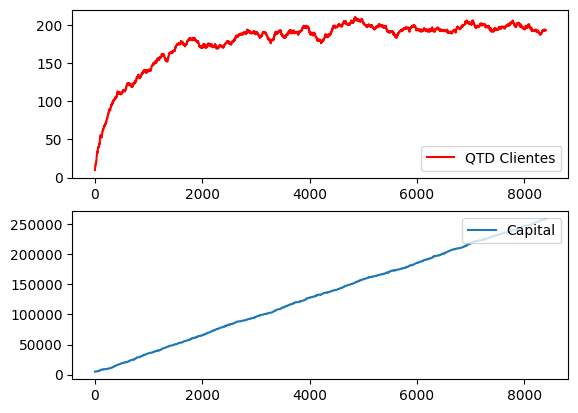

In [115]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots(nrows = 2)
eixo_x = [i for i in range(len(vetor_n))]
aux[0].plot(eixo_x, vetor_n,label = 'QTD Clientes', c = 'r')
aux[0].legend(loc = 'lower right')
aux[1].plot(eixo_x, vetor_c, label = 'Capital')
aux[1].legend(loc='upper right')
plt.show()

**Resposta: Com c = 35 já temos um sistema bem estável**